In [1]:
import keras
keras.__version__

'2.7.0'

In [10]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [11]:
len(train_data)

8982

In [12]:
len(test_data)

2246

In [13]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [14]:
word_index= reuters.get_word_index()
print(list(word_index.items())[0:10])
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
print(list(reverse_word_index.items())[0:10])

[('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804)]
[(10996, 'mdbl'), (16260, 'fawc'), (12089, 'degussa'), (8803, 'woods'), (13796, 'hanging'), (20672, 'localized'), (20673, 'sation'), (20675, 'chanthaburi'), (10997, 'refunding'), (8804, 'hermann')]


In [15]:
train_labels[10]

3

In [16]:
import numpy as np
np.random.seed(5)
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1.
    return results
x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

In [17]:
def to_one_hot(labels, dimension=46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1.
    return results
one_hot_train_labels=to_one_hot(train_labels)
ont_hot_test_lables=to_one_hot(test_labels)

In [18]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [21]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train,partial_y_train,epochs=5,batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/5
16/16 [==============================] - 1s 27ms/step - loss: 2.5888 - accuracy: 0.5298 - val_loss: 1.7359 - val_accuracy: 0.6510
Epoch 2/5
16/16 [==============================] - 0s 17ms/step - loss: 1.4190 - accuracy: 0.7070 - val_loss: 1.2925 - val_accuracy: 0.7190
Epoch 3/5
16/16 [==============================] - 0s 18ms/step - loss: 1.0428 - accuracy: 0.7825 - val_loss: 1.1173 - val_accuracy: 0.7590
Epoch 4/5
16/16 [==============================] - 0s 17ms/step - loss: 0.8141 - accuracy: 0.8262 - val_loss: 1.0155 - val_accuracy: 0.7850
Epoch 5/5
71/71 [==============================] - 0s 1ms/step - loss: 1.0135 - accuracy: 0.7760


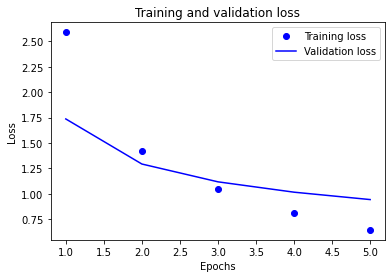

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

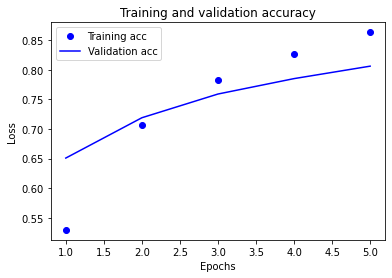

In [29]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
results

[1.013508677482605, 0.7760462760925293]

In [31]:
predictions=model.predict(x_test)

In [32]:
predictions[0].shape

(46,)

In [33]:
predictions[0]

array([4.0080402e-05, 7.9454348e-04, 6.7955203e-04, 7.4549294e-01,
       2.2271986e-01, 1.6808362e-05, 1.4303604e-04, 8.9380686e-05,
       3.8765192e-03, 4.9857725e-04, 5.5111264e-04, 2.0465844e-03,
       3.3154603e-04, 8.2318502e-04, 2.1185744e-05, 9.6701369e-05,
       3.4391352e-03, 9.4194198e-04, 1.4218180e-04, 3.1426167e-03,
       1.4601633e-03, 2.4954577e-03, 2.0513844e-05, 3.1023554e-04,
       1.4448132e-04, 6.7729852e-04, 4.9942315e-05, 4.6533911e-05,
       3.3398470e-04, 2.1409681e-04, 1.1941179e-03, 9.4200397e-04,
       8.6759050e-05, 7.5793498e-05, 1.2317497e-03, 9.7137681e-06,
       1.6458959e-03, 4.1435032e-05, 1.8659828e-04, 5.2546029e-04,
       2.4822381e-04, 1.6136259e-03, 2.0824128e-04, 3.0411931e-04,
       4.1962816e-05, 4.0964042e-06], dtype=float32)

In [34]:
np.sum(predictions[0])

1.0

In [35]:
np.argmax(predictions[0])

3